In [1]:
import cmocean.cm as cm
import h5py
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

%matplotlib inline

In [2]:
dso = xr.open_dataset('/data/sallen/results/MIDOSS/Lagrangian_DieselFuel_refined_15jan18-22jan18_Diesel.nc')
dsf = xr.open_dataset('/data/sallen/results/MIDOSS/fix_beaching/Lagrangian_DieselFuel_refined_15jan18-22jan18_Diesel.nc')
mesh = xr.open_dataset('~/MEOPAR/grid/mesh_mask201702.nc')

In [3]:
dso.keys()

KeysView(<xarray.Dataset>
Dimensions:              (grid_x: 396, grid_x_latlon: 397, grid_y: 896, grid_y_latlon: 897, grid_z: 40, time: 191)
Coordinates:
  * time                 (time) datetime64[ns] 2018-01-15T00:30:00 ... 2018-01-22T22:30:00
  * grid_y               (grid_y) int16 0 1 2 3 4 5 ... 890 891 892 893 894 895
  * grid_x               (grid_x) int16 0 1 2 3 4 5 ... 390 391 392 393 394 395
  * grid_z               (grid_z) int16 0 1 2 3 4 5 6 7 ... 33 34 35 36 37 38 39
  * grid_y_latlon        (grid_y_latlon) float32 0.0 1.0 2.0 ... 895.0 896.0
  * grid_x_latlon        (grid_x_latlon) float32 0.0 1.0 2.0 ... 395.0 396.0
Data variables:
    OilConcentration_2D  (time, grid_y, grid_x) float64 ...
    Thickness_2D         (time, grid_y, grid_x) float64 ...
    Dissolution_3D       (time, grid_z, grid_y, grid_x) float64 ...
    OilConcentration_3D  (time, grid_z, grid_y, grid_x) float64 ...
    Latitude             (grid_y_latlon, grid_x_latlon) float64 ...
    Longitude       

## NetCDF Thickness:
disappears after it = 12

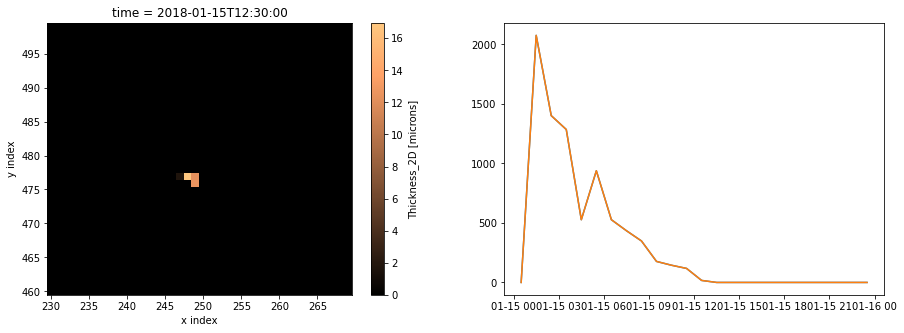

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
it = 12
dso.Thickness_2D[it, 460:500 , 230:270].plot(ax=axs[0], cmap='copper')
axs[1].plot(dso.time[0:24], dso.Thickness_2D[0:24].max(axis=1).max(axis=1));
axs[1].plot(dsf.time[0:24], dsf.Thickness_2D[0:24].max(axis=1).max(axis=1));

## NetCDF 2D Concentration:
Very similar response, also disappears after it = 12

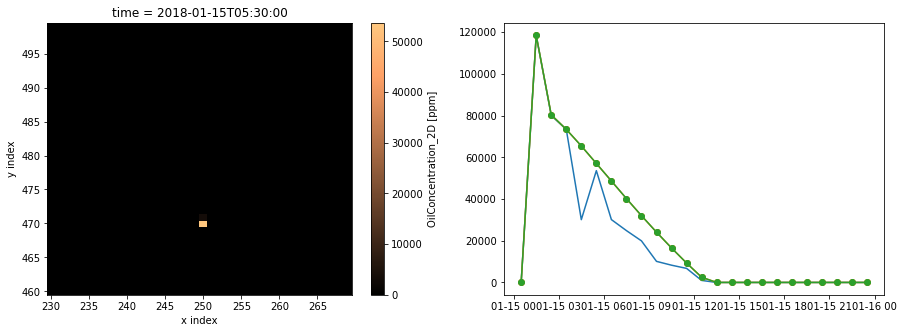

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
it = 5
dso.OilConcentration_2D[it, 460:500 , 230:270].plot(ax=axs[0], cmap='copper')
axs[1].plot(dso.time[0:24], dso.OilConcentration_2D[0:24].max(axis=1).max(axis=1));
axs[1].plot(dso.time[0:24], dso.OilConcentration_2D[0:24].sum(axis=1).sum(axis=1), 'o-');
axs[1].plot(dsf.time[0:24], dsf.OilConcentration_2D[0:24].sum(axis=1).sum(axis=1), 'o-');

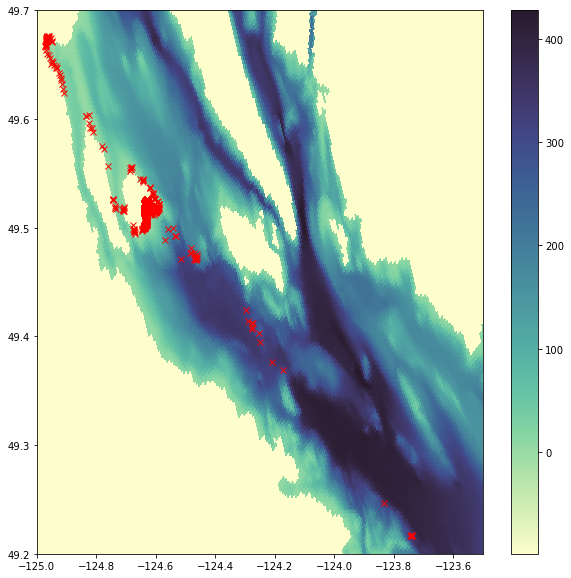

In [275]:
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
imin, imax = 470, 485
jmin, jmax = 230, 255
colour = ax.pcolormesh(hdf['Grid']['Longitude'][:], hdf['Grid']['Latitude'][:], hdf['Grid']['Bathymetry'][:], cmap=cm.deep)
fig.colorbar(colour)
for i in range (2000):
    if hdf['Results']['OilSpill']['Beached']['Beached_00190'][i] > 1:
#        print (i, hdf['Results']['OilSpill']['Longitude']['Longitude_00190'][i],
#               hdf['Results']['OilSpill']['Latitude']['Latitude_00190'][i])
        ax.plot(hdf['Results']['OilSpill']['Longitude']['Longitude_00190'][i],
               hdf['Results']['OilSpill']['Latitude']['Latitude_00190'][i], 'rx')
ax.set_xlim((-125, -123.5))
ax.set_ylim((49.2, 49.7));

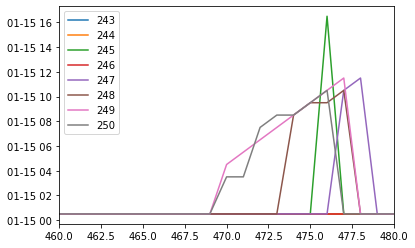

In [9]:
fig, ax = plt.subplots(1, 1)
for j in range(243, 251):
    plt.plot(dso.Oil_Arrival_Time[:, j], label=str(j));
ax.set_xlim(460, 480)
ax.legend();

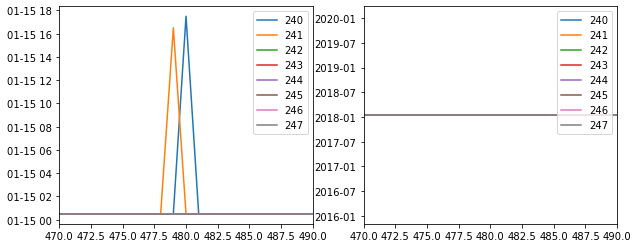

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
for j in range(240, 248):
    axs[0].plot(dso.Beaching_Time[:, j], label=str(j));
    axs[1].plot(dsf.Beaching_Time[:, j], label=str(j));
for ax in axs:
    ax.set_xlim(470, 490)
    ax.legend();

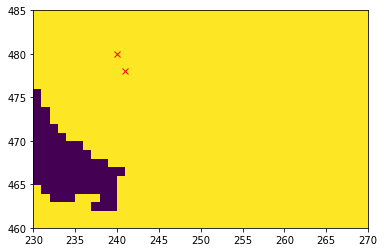

In [10]:
fig, ax = plt.subplots(1, 1)
ax.pcolormesh(mesh.tmask[0, 0])
ax.set_ylim(460, 485)
ax.set_xlim(230, 270)
ax.plot([240, 241], [480, 478], 'rx');

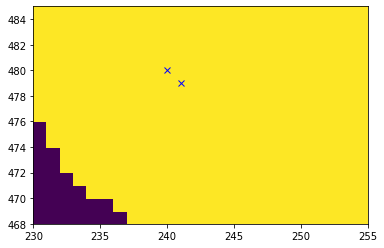

In [25]:
it = 17
fig, ax = plt.subplots(1, 1)
ax.pcolormesh(mesh.tmask[0, 0])
imin, imax = 468, 485
jmin, jmax = 230, 255
ax.set_ylim(imin, imax)
ax.set_xlim(jmin, jmax)
for i in range(imin, imax):
    for j in range(jmin, jmax):
        if dso.OilConcentration_2D[it, i, j] != 0:
            plt.plot(j, i, 'bs')
        if dso.Beaching_Time[i, j] > dso.time[0].values and dso.Beaching_Time[i, j] <= dso.time[it].values:
            plt.plot(j, i, 'bx')
        if dsf.OilConcentration_2D[it, i, j] != 0:
            plt.plot(j, i, 'ro')
        if dsf.Beaching_Time[i, j] > dsf.time[0].values and dsf.Beaching_Time[i, j] <= dsf.time[it].values:
            plt.plot(j, i, 'rx')

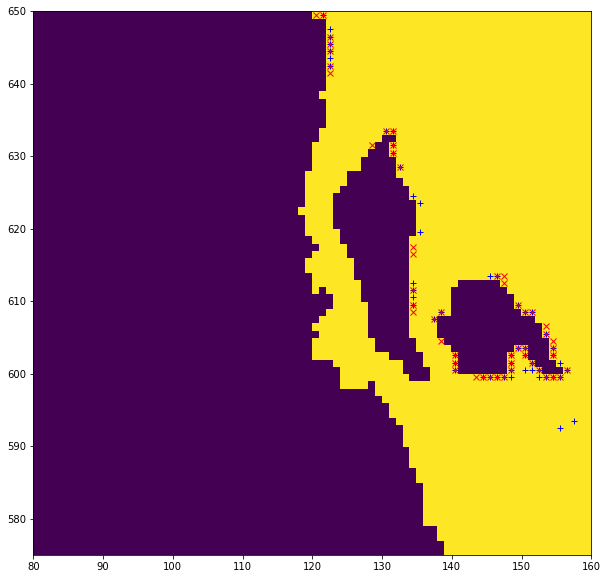

In [37]:
it = 189
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.pcolormesh(mesh.tmask[0, 0])
imin, imax = 575, 650
jmin, jmax = 80, 160
ishift = 1.5
jshift = 1.5
ax.set_ylim(imin, imax)
ax.set_xlim(jmin, jmax)
for i in range(imin, imax, 1):
    for j in range(jmin, jmax, 1):
        if dso.OilConcentration_2D[it, i, j] != 0:
            plt.plot(j + jshift, i + ishift, 'bs')
        if dso.Beaching_Time[i, j] > dso.time[0].values and dso.Beaching_Time[i, j] <= dso.time[it].values:
            plt.plot(j + jshift, i + ishift, 'b+')
        if dsf.OilConcentration_2D[it, i, j] != 0:
            plt.plot(j + jshift, i + ishift, 'ro')
        if dsf.Beaching_Time[i, j] > dsf.time[0].values and dsf.Beaching_Time[i, j] <= dsf.time[it].values:
            plt.plot(j + jshift, i + ishift, 'rx')